# Tracer des graphiques

Nous utiliserons la librairie matplotlib. La page [https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html) contient de nombreux exemples.

Les fonctions sont dans le module ``matplotlib.pyplot`` qu'il est courant d'importer sous le nom de ``plt``.

## Exemples

Le plus simple est d'étudier des exemples. 

### Graphiques simples

In [ ]:
import numpy as np

X = np.linspace(-2,2, 100)
Y = np.sin(X)**2*np.exp(-X**2)
Y_noise = Y + .1*(np.random.rand(len(X))-0.5)


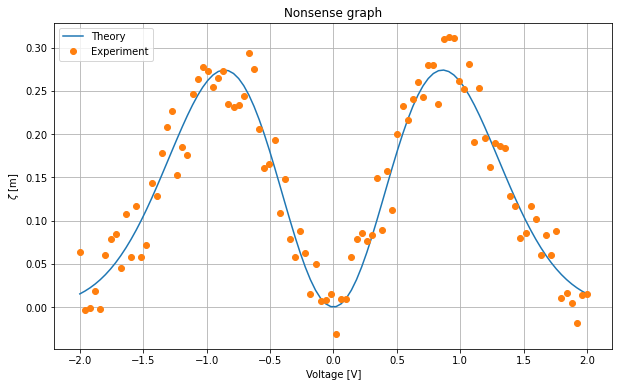

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(X,Y, label=u"Theory")
plt.plot(X,Y_noise,'o', label=u"Experiment")
plt.xlabel(r'Voltage [V]')
plt.ylabel(r'$\zeta$ [m]')
plt.title("Nonsense graph")
plt.legend(loc='upper left')
plt.grid(True)

plt.savefig('mafigure.pdf')

Il existe deux syntaxes pour matplotlib, la syntaxe ci-dessus à base de fonctions (syntaxe historiquement utilisée par beaucoup de personnes) et une syntaxe utilisant sur des objets. L'idée est d'utiliser des méthodes des objets figure ainsi que des graphiques (appelé ``axes``, il peut y avoir plusieurs ``axes``, à ne pas confondre avec ``axis`` qui sont les abscisses et ordonnées).

Voici le même exemple en orienté objet: 

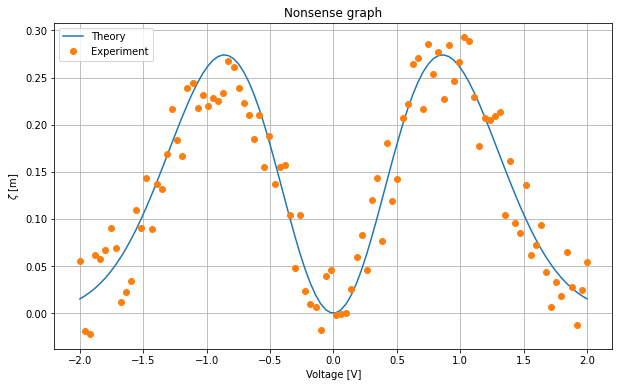

In [2]:
from matplotlib.pyplot import figure

fig = figure(figsize=(10, 6))
ax = fig.subplots(1, 1) # Création d'un graphique

ax.plot(X, Y, label=u"Theory")
ax.plot(X, Y_noise, 'o', label=u"Experiment")
ax.set_xlabel(r'Voltage [V]')
ax.set_ylabel(r'$\zeta$ [m]')
ax.set_title("Nonsense graph")
ax.legend(loc='upper left')
ax.grid(True)

Le syntaxe orientée objet est plus simple lorsque l'on veut mettre plusieurs graphs dans une même figure. 

### Graphiques multiples

Text(0, 0.5, 'Pression [mbar]')

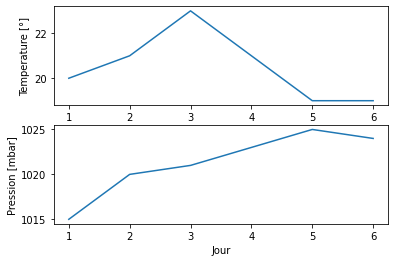

In [22]:
jours = np.array([1, 2, 3, 4, 5, 6])
temperature = np.array([20, 21, 23, 21, 19, 19])
pression = np.array([1015, 1020, 1021, 1023, 1025, 1024])

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(jours, temperature)
plt.ylabel('Temperature [°]')
plt.subplot(2, 1, 2)
plt.plot(jours, pression)

plt.xlabel('Jour')
plt.ylabel('Pression [mbar]')

Text(0, 0.5, 'Pression [mbar]')

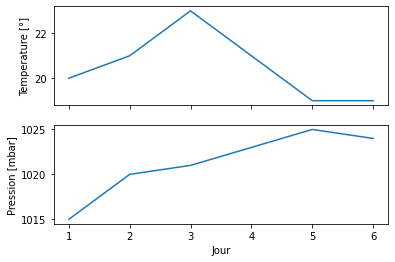

In [23]:
fig = figure()
ax1, ax2 = fig.subplots(2, 1, sharex=True)
ax1.plot(jours, temperature)
ax1.set_ylabel('Temperature [°]')

ax2.plot(jours, pression)

ax2.set_xlabel('Jour')
ax2.set_ylabel('Pression [mbar]')

### Barres d'erreur

Text(0.5, 1.0, 'Le titre')

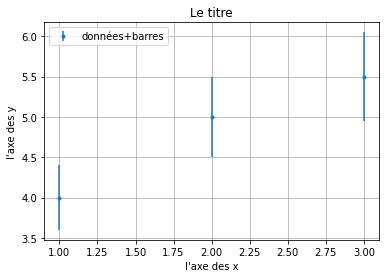

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([4, 5, 5.5])
erreurs_y = 0.1 * y

plt.errorbar(x, y, erreurs_y, fmt='.', label="données+barres")

plt.xlabel("l'axe des x")
plt.ylabel("l'axe des y")
plt.legend(loc=2)
plt.grid()
plt.title("Le titre")

### Inset

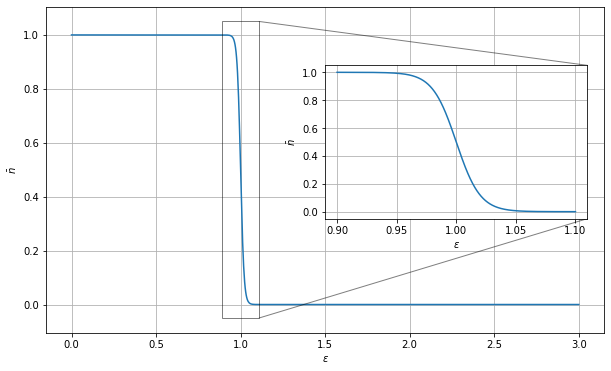

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def fermi_dirac(epsilon, mu, beta):
    return 1/(np.exp(beta*(epsilon - mu))+1)

x = np.linspace(0, 3, num=1000)
x_zoom = np.linspace(0.9, 1.1, num=1000)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots(1, 1)

ax.plot(x, fermi_dirac(x, mu=1, beta=100))

axins = ax.inset_axes([0.5, 0.35, 0.47, 0.47])
axins.plot(x_zoom, fermi_dirac(x_zoom, mu=1, beta=100))
ax.indicate_inset_zoom(axins, edgecolor="black")

for a in [ax, axins]:
    a.set_xlabel(r'$\epsilon$')
    a.set_ylabel(r'$\bar n$')
    a.grid()

### Echelle logarithmique



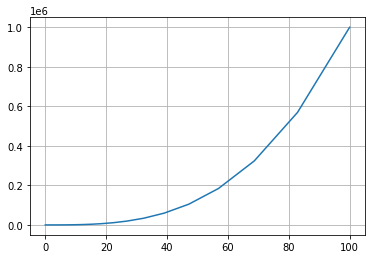

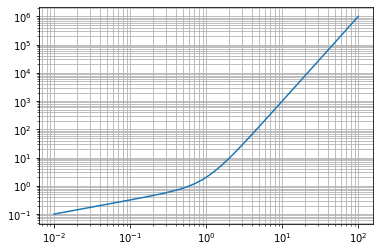

In [32]:
x = np.logspace(-2, 2)
y = x**3 + np.sqrt(x)

fig = figure()
ax = fig.subplots(1, 1)
ax.plot(x, y)
ax.grid()

fig = figure()
ax = fig.subplots(1, 1)
ax.loglog(x, y)
ax.grid(which="both")

## Les commandes

### Créer le graphique

- ``plt.figure(figsize=(w, h))`` : Permet de créer la figure. Largeur et hauteur en pouce (2.54 cm)
- ``fig.subplots(n, m)`` : découpe la figure en n (verticalement) et m (horizontalement) graphiques. Cette commander renvoie une matrice de n par m axes. Avec la méthode fonctionnel, la commande ``plt.subplot(n, m, i)`` créer le ième axe de la matrice et le sélectionne pour le prochain plot.

### Tracer des données
Toutes ces fonctions sont les mêmes en mode fonctionnel ou objet. 

- ``plot(X, Y)`` trace avec une ligne
- ``plot(X, Y, fmt)`` pour contrôler la forme et la couleur. Couleurs : blue (b), red (r), black (k), green (g). Forme : disque (o), diamand (d), ligne pointillée (:), ...
- ``plot(X, Y, color=..., linestyle=..., linewidth=...)``, syntaxe plus explicite. Les couleurs peuvent être en tout lettre (red, blue, orange, ..) suivre le cycle par défaut (C0, C1, C2, C3), ou être définie par l'intensité RGB. Le style des lignes : solid, dotted, dashed, dashdot. La linewidth est en point.

- ``loglog``, ``semilogy``, ``semilogx`` : pour tracer avec des échelles logarithmique. On peut aussi changer avec ``plt.xscale('log')`` ou ``ax.set_xscale``

- ``errorbar(x, y, yerr=..., xerr=...)``: pour tracer des points avec des barres d'erreur.

- ``scatter(x, y, s=..., c=...)`` pour tracer un nuage de points avec des tailles (s) ou des couleurs (c) sous forme d'un tableau.

### Légendes,...

- Toutes les fonctions ci-dessus ont un argument optionel ``label``. On peut alors utiler la fonction plt.legend (ou ax.legend) pour afficher la légende.

- ``xlabel``, ``ylabel`` : ne jamais oublier les unités
- ``grid`` : Tracer une grille en arrière plan

- ``text`` : rajoute un texte

Remarques : pour les chaînes de caractère, il est possible d'utiliser des formules latex en utilisant des ``$``. Il faut alors faire attention aux ``\`` : en effet il est possible qu'ils soient interprété comme des caractères spéciaux (par exemple ``\n`` est un retour à la ligne). Pour éviter ceci, on utilise des chaîne brutes (raw string), préfixées par un ``r``. 